In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

matplotlib 한글 깨짐 방지를 위한 폰트 설치

In [11]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 5 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (20.0 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype


설치가 끝났으면 Ctrl + M + .을 눌러 런타임 재시작

In [4]:
plt.rc('font', family = 'NanumBarunGothic')

### Train, Test 데이터 셋 불러오기

드라이브 마운트 후 데이터 불러오기(저는 미리 드라이브에 데이터를 넣었습니다)

In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

In [1]:
cd drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [5]:
train = pd.read_excel('train.xlsx')
test = pd.read_excel("test.xlsx")

In [6]:
train.head()

,번호,연령,성별,상황키워드,신체질환,감정_대분류,감정_소분류,사람문장1,시스템응답1,사람문장2,시스템응답2,사람문장3,시스템응답3,사람문장4,시스템응답4
0,44164,청년,남성,"연애, 결혼, 출산",해당없음,기쁨,신이 난,아내가 드디어 출산하게 되어서 정말 신이 나.,아내분이 출산을 하시는군요. 정말 축하드려요.,아 지금 정말 신이 나.,잘 된 일이네요.,아기가 점점 클게 벌써 기대가 되네. 내가 많이 놀아줘야지.,좋은 아빠가 되실 거 같아요. 진심으로 축하드려요.,NaN,NaN
1,3926,노년,남성,"건강, 죽음",만성질환 유,불안,스트레스 받는,당뇨랑 합병증 때문에 먹어야 할 약이 열 가지가 넘어가니까 스트레스야.,약 종류가 많아 번거로우시겠어요.,건강할 때 관리 좀 잘할걸 하는 생각이 들더라고.,현재 상황에서 변화를 주기 위해 어떻게 하면 될까요?,약을 잘 챙겨 먹고 나을 수 있도록 노력해야지.,약을 잘 챙겨 먹어 건강해지시길 바랄게요.,NaN,NaN
2,50882,청소년,여성,학업 및 진로,해당없음,당황,당황,고등학교에 올라오니 중학교 때보다 수업이 갑자기 어려워져서 당황스러워.,고등학교 수업이 중학교 때와는 다르게 갑자기 어려워서 당황스러우시군요.,아직 학기 초인데 내가 수업에 잘 따라갈 수 있을지 걱정돼.,이 상황에서 할 수 있는 게 어떤 것이 있을까요?,중학교 수업을 들을 때보다 훨씬 더 열심히 할 거야.,수업을 어떤 방식으로 열심히 듣는게 좋을까요?,선생님이 강조하신 부분을 필기하고 집에서 매일 수업 내용을 복습하려고 해.,열심히 해서 좋은 결과가 있었으면 좋겠어요.
3,31303,노년,남성,재정,만성질환 무,기쁨,신이 난,재취업이 돼서 받게 된 첫 월급으로 온 가족이 외식을 할 예정이야. 너무 행복해.,재취업 후 첫 월급이라 정말 기쁘시겠어요.,퇴직 후 다시는 돈을 못 벌 줄 알았는데 이렇게 월급으로 가족에게 맛있는 밥을 살 ...,이 기분을 유지하려면 어떻게 해야 할까요?,회사생활을 열심히 해서 계속 월급을 받을거야!,계속 원하시는 대로 회사생활이 이어지길 바랄게요.,NaN,NaN
4,47200,노년,여성,재정,만성질환 유,기쁨,안도,빚을 드디어 다 갚게 되어서 이제야 안도감이 들어.,기분 좋으시겠어요. 앞으로는 어떻게 하실 생각이신가요?,빚도 다 갚았으니 당분간은 아무 생각도 안 하며 살고 싶어.,빚도 다 갚았으니 당분간은 아무 생각도 안 하며 살고 싶으시군요.,NaN,NaN,NaN,NaN


In [7]:
test.head()

,번호,연령,성별,상황키워드,신체질환,감정_대분류,감정_소분류,사람문장1,시스템응답1,사람문장2,시스템응답2,사람문장3,시스템응답3,사람문장4,시스템응답4
0,23093,청년,여성,"진로, 취업, 직장",해당없음,분노,툴툴대는,요즘 부모님과 많이 부딪혀.,어떤 일로 부딪히시나요?,난 하고 싶은 일이 있는데 부모님은 안정적인 일만 하라고 하셔. 내 마음대로 하지도...,부모님과의 충돌로 힘드시겠군요.,응. 그래도 난 내가 하고 싶은 일을 위해 노력할 거야.,자신이 하고 싶은 일을 목표로 하기로 하셨군요.,NaN,NaN
1,32848,청소년,남성,가족관계,해당없음,슬픔,비통한,엄마가 결국 집을 나갔어. 너무 너무 슬퍼.,어머니께서 집을 나가셨다니 정말 슬프셨겠어요. 좀 더 자세히 얘기해주시겠어요?,엄마도 엄마만의 인생이 있을 테니 가지 말라고 할 수가 없었어. 그래서 더 마음이 ...,정말 많이 답답하셨겠어요. 어떻게 하는 게 기분이 좀 풀릴까요?,일단 좀 자야겠어.,일단 휴식을 가질 생각이시군요.,NaN,NaN
2,35590,청소년,남성,학교폭력/따돌림,해당없음,불안,조심스러운,학교에서 한 친구를 괴롭히는 무리에게 그만하라고 했어.,용기 있는 행동을 하셨네요. 마음이 어떠셨나요?,그런데 말을 하고 난 후 나도 괴롭힐까 봐 불안했어.,그랬군요. 지금 기분에서 벗어나기 위해 할 수 있는 일에는 무엇이 있을까요?,나는 옳은 일을 한 거라고 생각해. 나까지 괴롭힌다면 신고할 거야.,지금의 상황이 나의 방식으로써 잘 해결될 수 있기를 바라요.,NaN,NaN
3,169,청년,남성,"진로, 취업, 직장",해당없음,당황,죄책감의,이번에 팀장님이 간단한 조사 업무를 부탁하셨는데 내가 잘못 처리했어. 너무 절망적이야.,팀장님이 부탁하신 업무를 잘못 처리하셔서 많이 당황하시고 놀라셨겠어요.,곧 있으면 인턴에서 정규직 전환 평가가 있는데 안 좋을 것 같아.,마음이 많이 안 좋으시겠어요. 지금 상황을 타개할 수 있는 가장 좋은 방안이 있을까요?,우선 잘못된 부분을 솔직하게 말씀드리고 수정하기 위해서 최선을 다해봐야겠어.,잘못된 부분을 잘 수정해서 좋은 결과가 있었으면 좋겠어요.,NaN,NaN
4,38435,중년,여성,"재정, 은퇴, 노후준비",해당없음,분노,노여워하는,남편이 이혼할 때 위자료를 주지 않으려고 변호사를 고용했어.,많이 화가 나시겠어요.,어떻게 그럴 수가 있지? 너무 화가 나.,어떻게 하면 지금의 감정을 추스를 수 있을까요?,나도 변호사를 고용해서 한번 얘기해보려고 해.,자녀분들이랑 함께 하며 슬픔을 극복하시길 바라요.,NaN,NaN


### 전처리

분석에 필요 없는 열 삭제

In [6]:
train = train.drop('번호', axis = 1)
test = test.drop('번호', axis = 1)

train.head()

,연령,성별,상황키워드,신체질환,감정_대분류,감정_소분류,사람문장1,시스템응답1,사람문장2,시스템응답2,사람문장3,시스템응답3,사람문장4,시스템응답4
0,청년,남성,"연애, 결혼, 출산",해당없음,기쁨,신이 난,아내가 드디어 출산하게 되어서 정말 신이 나.,아내분이 출산을 하시는군요. 정말 축하드려요.,아 지금 정말 신이 나.,잘 된 일이네요.,아기가 점점 클게 벌써 기대가 되네. 내가 많이 놀아줘야지.,좋은 아빠가 되실 거 같아요. 진심으로 축하드려요.,NaN,NaN
1,노년,남성,"건강, 죽음",만성질환 유,불안,스트레스 받는,당뇨랑 합병증 때문에 먹어야 할 약이 열 가지가 넘어가니까 스트레스야.,약 종류가 많아 번거로우시겠어요.,건강할 때 관리 좀 잘할걸 하는 생각이 들더라고.,현재 상황에서 변화를 주기 위해 어떻게 하면 될까요?,약을 잘 챙겨 먹고 나을 수 있도록 노력해야지.,약을 잘 챙겨 먹어 건강해지시길 바랄게요.,NaN,NaN
2,청소년,여성,학업 및 진로,해당없음,당황,당황,고등학교에 올라오니 중학교 때보다 수업이 갑자기 어려워져서 당황스러워.,고등학교 수업이 중학교 때와는 다르게 갑자기 어려워서 당황스러우시군요.,아직 학기 초인데 내가 수업에 잘 따라갈 수 있을지 걱정돼.,이 상황에서 할 수 있는 게 어떤 것이 있을까요?,중학교 수업을 들을 때보다 훨씬 더 열심히 할 거야.,수업을 어떤 방식으로 열심히 듣는게 좋을까요?,선생님이 강조하신 부분을 필기하고 집에서 매일 수업 내용을 복습하려고 해.,열심히 해서 좋은 결과가 있었으면 좋겠어요.
3,노년,남성,재정,만성질환 무,기쁨,신이 난,재취업이 돼서 받게 된 첫 월급으로 온 가족이 외식을 할 예정이야. 너무 행복해.,재취업 후 첫 월급이라 정말 기쁘시겠어요.,퇴직 후 다시는 돈을 못 벌 줄 알았는데 이렇게 월급으로 가족에게 맛있는 밥을 살 ...,이 기분을 유지하려면 어떻게 해야 할까요?,회사생활을 열심히 해서 계속 월급을 받을거야!,계속 원하시는 대로 회사생활이 이어지길 바랄게요.,NaN,NaN
4,노년,여성,재정,만성질환 유,기쁨,안도,빚을 드디어 다 갚게 되어서 이제야 안도감이 들어.,기분 좋으시겠어요. 앞으로는 어떻게 하실 생각이신가요?,빚도 다 갚았으니 당분간은 아무 생각도 안 하며 살고 싶어.,빚도 다 갚았으니 당분간은 아무 생각도 안 하며 살고 싶으시군요.,NaN,NaN,NaN,NaN


### 데이터셋 확인

In [ ]:
for col in train.columns[:6]:
  print(col,' :',set(train[col]))

연령  : {'중년', '청년', '청소년', '노년'}
성별  : {'남성', '여성'}
상황키워드  : {'연애, 결혼, 출산', '진로, 취업, 직장', '재정, 은퇴, 노후준비', '직장, 업무 스트레스', '가족관계', '건강', '대인관계', '대인관계(부부, 자녀)', '학교폭력/따돌림', '학업 및 진로', '건강, 죽음', '재정'}
신체질환  : {'해당없음', '만성질환 무', '만성질환 유'}
감정_대분류  : {'당황', '상처', '분노', '불안 ', '슬픔', '기쁨 ', '불안', '기쁨'}
감정_소분류  : {'감사하는', '상처', '배신당한', '짜증내는', '자신하는', '후회되는', '남의 시선을 의식하는', '구역질 나는', '신이 난', '비통한', '가난한, 불우한', '걱정스러운', '편안한', '죄책감의', '악의적인', '스트레스 받는', '열등감', '부끄러운', '실망한', '충격 받은', '두려운', '눈물이 나는', '우울한', '안달하는', '흥분', '기쁨', '툴툴대는', '느긋', '혐오스러운', '당황', '만족스러운', '분노', '고립된', '낙담한', '성가신', '희생된', '안도', '한심한', '노여워하는', '회의적인', '억울한', '좌절한', '환멸을 느끼는', '초조한', '방어적인', '질투하는', '슬픔', '혼란스러운', '버려진', '염세적인', '외로운', '불안', '당혹스러운', '마비된', '신뢰하는', '취약한', '괴로워하는', '조심스러운'}


In [88]:
for col in test.columns[:6]:
  print(col,' :',set(test[col]))

연령  : {'청소년', '청년', '중년', '노년'}
성별  : {'여성', '남성'}
상황키워드  : {'건강', '대인관계', '가족관계', '대인관계(부부, 자녀)', '재정', '학업 및 진로', '연애, 결혼, 출산', '직장, 업무 스트레스', '진로, 취업, 직장', '재정, 은퇴, 노후준비', '학교폭력/따돌림', '건강, 죽음'}
신체질환  : {'만성질환 유', '해당없음', '만성질환 무'}
감정_대분류  : {'분노', '상처', '기쁨', '슬픔', '불안', '당황'}
감정_소분류  : {'신이 난', '걱정스러운', '짜증내는', '남의 시선을 의식하는', '취약한', '혼란스러운', '안도', '구역질 나는', '슬픔', '마비된', '신뢰하는', '혐오스러운', '부끄러운', '두려운', '회의적인', '감사하는', '성가신', '후회되는', '기쁨', '배신당한', '죄책감의', '당황', '열등감', '외로운', '환멸을 느끼는', '고립된', '충격 받은', '안달하는', '흥분', '방어적인', '좌절한', '상처', '편안한', '가난한, 불우한', '노여워하는', '초조한', '느긋', '스트레스 받는', '괴로워하는', '불안', '낙담한', '희생된', '조심스러운', '분노', '만족스러운', '질투하는', '악의적인', '염세적인', '실망한', '당혹스러운', '버려진', '우울한', '툴툴대는', '비통한', '억울한', '한심한', '자신하는', '눈물이 나는'}


컬럼 별 분포

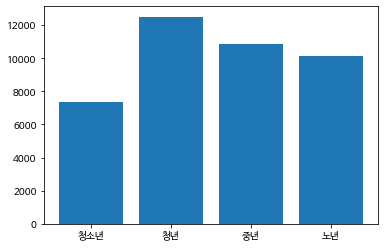

In [26]:
plt.bar(list(set(train["연령"])), train.groupby("연령")['연령'].count()[list(set(train["연령"]))])

plt.show()

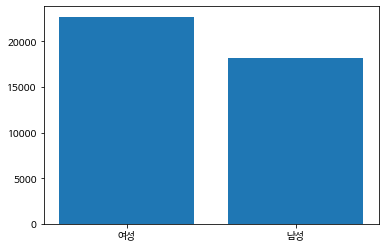

In [25]:
plt.bar(list(set(train["성별"])), train.groupby("성별")['성별'].count()[list(set(train["성별"]))])

plt.show()

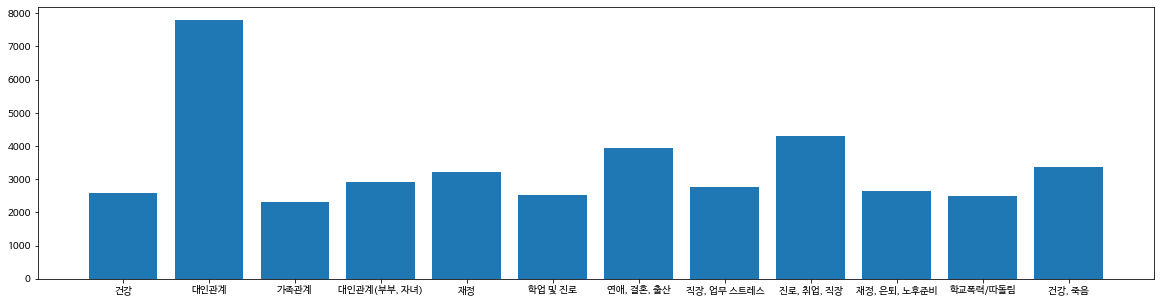

In [36]:
plt.figure(figsize = (20,5))
plt.bar(list(set(train["상황키워드"])), train.groupby("상황키워드")['상황키워드'].count()[list(set(train["상황키워드"]))])

plt.show()

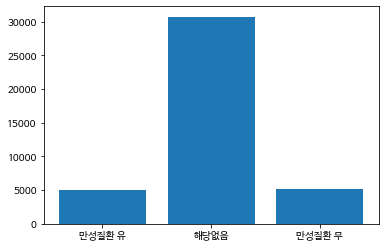

In [37]:
plt.bar(list(set(train["신체질환"])), train.groupby("신체질환")['신체질환'].count()[list(set(train["신체질환"]))])

plt.show()

In [89]:
train = train.replace('해당없음',"만성질환 무")

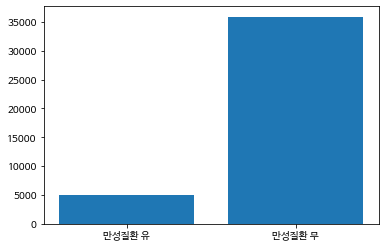

In [90]:
plt.bar(list(set(train["신체질환"])), train.groupby("신체질환")['신체질환'].count()[list(set(train["신체질환"]))])

plt.show()

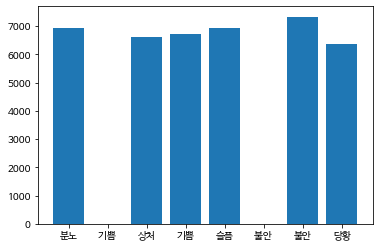

In [38]:
plt.bar(list(set(train["감정_대분류"])), train.groupby("감정_대분류")['감정_대분류'].count()[list(set(train["감정_대분류"]))])

plt.show()

In [86]:
train = train.replace('기쁨 ',"기쁨")
train = train.replace('불안 ',"불안")

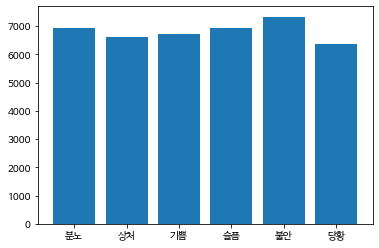

In [87]:
plt.bar(list(set(train["감정_대분류"])), train.groupby("감정_대분류")['감정_대분류'].count()[list(set(train["감정_대분류"]))])

plt.show()

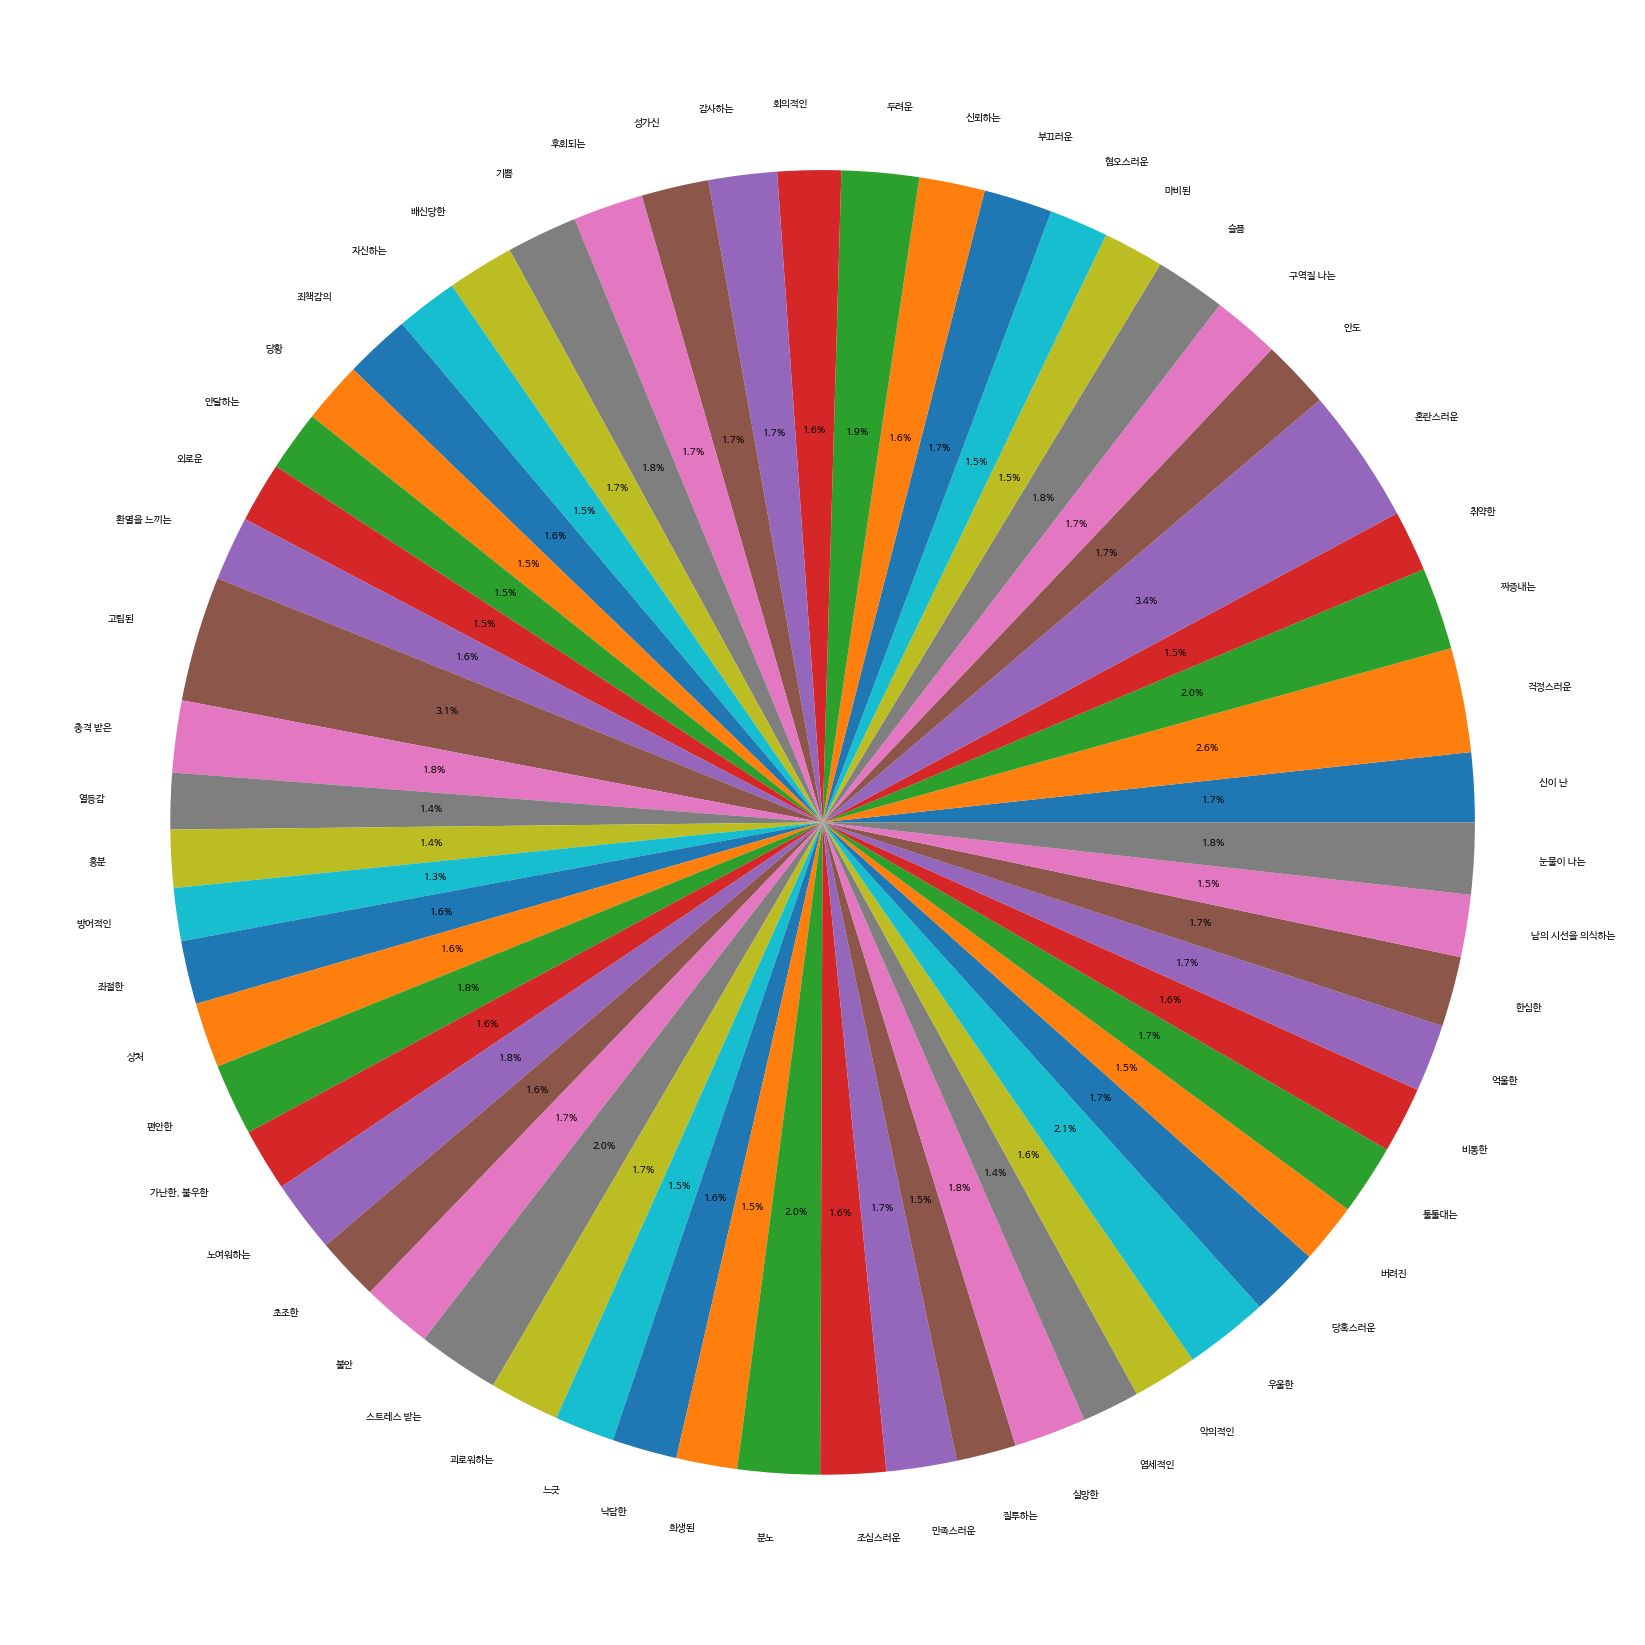

In [55]:
plt.figure(figsize=(30,30))
plt.pie(train.groupby("감정_소분류")['감정_소분류'].count()[list(set(train["감정_소분류"]))],labels = list(set(train["감정_소분류"])), autopct='%.1f%%')

plt.show()

X, y 나누기


In [91]:
X_train = train.drop(['감정_대분류','감정_소분류'],axis = 1)
y_train = train[['감정_대분류','감정_소분류']]
X_test = test.drop(['감정_대분류','감정_소분류'],axis = 1)
y_test = test[['감정_대분류','감정_소분류']]

In [92]:
X_train.head()

,연령,성별,상황키워드,신체질환,사람문장1,시스템응답1,사람문장2,시스템응답2,사람문장3,시스템응답3,사람문장4,시스템응답4
0,청년,남성,"연애, 결혼, 출산",만성질환 무,아내가 드디어 출산하게 되어서 정말 신이 나.,아내분이 출산을 하시는군요. 정말 축하드려요.,아 지금 정말 신이 나.,잘 된 일이네요.,아기가 점점 클게 벌써 기대가 되네. 내가 많이 놀아줘야지.,좋은 아빠가 되실 거 같아요. 진심으로 축하드려요.,NaN,NaN
1,노년,남성,"건강, 죽음",만성질환 유,당뇨랑 합병증 때문에 먹어야 할 약이 열 가지가 넘어가니까 스트레스야.,약 종류가 많아 번거로우시겠어요.,건강할 때 관리 좀 잘할걸 하는 생각이 들더라고.,현재 상황에서 변화를 주기 위해 어떻게 하면 될까요?,약을 잘 챙겨 먹고 나을 수 있도록 노력해야지.,약을 잘 챙겨 먹어 건강해지시길 바랄게요.,NaN,NaN
2,청소년,여성,학업 및 진로,만성질환 무,고등학교에 올라오니 중학교 때보다 수업이 갑자기 어려워져서 당황스러워.,고등학교 수업이 중학교 때와는 다르게 갑자기 어려워서 당황스러우시군요.,아직 학기 초인데 내가 수업에 잘 따라갈 수 있을지 걱정돼.,이 상황에서 할 수 있는 게 어떤 것이 있을까요?,중학교 수업을 들을 때보다 훨씬 더 열심히 할 거야.,수업을 어떤 방식으로 열심히 듣는게 좋을까요?,선생님이 강조하신 부분을 필기하고 집에서 매일 수업 내용을 복습하려고 해.,열심히 해서 좋은 결과가 있었으면 좋겠어요.
3,노년,남성,재정,만성질환 무,재취업이 돼서 받게 된 첫 월급으로 온 가족이 외식을 할 예정이야. 너무 행복해.,재취업 후 첫 월급이라 정말 기쁘시겠어요.,퇴직 후 다시는 돈을 못 벌 줄 알았는데 이렇게 월급으로 가족에게 맛있는 밥을 살 ...,이 기분을 유지하려면 어떻게 해야 할까요?,회사생활을 열심히 해서 계속 월급을 받을거야!,계속 원하시는 대로 회사생활이 이어지길 바랄게요.,NaN,NaN
4,노년,여성,재정,만성질환 유,빚을 드디어 다 갚게 되어서 이제야 안도감이 들어.,기분 좋으시겠어요. 앞으로는 어떻게 하실 생각이신가요?,빚도 다 갚았으니 당분간은 아무 생각도 안 하며 살고 싶어.,빚도 다 갚았으니 당분간은 아무 생각도 안 하며 살고 싶으시군요.,NaN,NaN,NaN,NaN


In [93]:
y_train.head()

,감정_대분류,감정_소분류
0,기쁨,신이 난
1,불안,스트레스 받는
2,당황,당황
3,기쁨,신이 난
4,기쁨,안도
